<a href="https://colab.research.google.com/github/turusan-asak/AI_SUMMERCAP-22-/blob/main/Medikal_Maliyet_Analizi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projede Gerekli Kütüphanelerin Colab Ortamına Yüklenmesi**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Veri okuma - ön işleme
import pandas as pd 
import numpy as np
# Veri Görselleştirme
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
# Makine öğrenim modelleri ve metrikler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

Projede Gerekli Datanın Colab Ortamına Yüklenmesi


In [ ]:
df_ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GlobalAiHub/dataSets/insurance.csv")
df = df_.copy()

# **Keşifsel Veri Analizi Yapılması**


# Datanın İncelenmesi 





In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe([0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,59.0000,62.000000,64.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,38.6195,41.106000,46.407900,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,3.0000,3.000000,5.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,34831.7197,41181.827787,48537.480726,63770.42801


In [ ]:
# Encoder işlemleri
encode = LabelEncoder()
df['smoker'] = encode.fit_transform(df['smoker'])
df['sex'] = encode.fit_transform(df['sex'])
df = pd.get_dummies(df, columns = ["region"], prefix = ["region"], drop_first = True)

In [ ]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


# ***1-Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz***

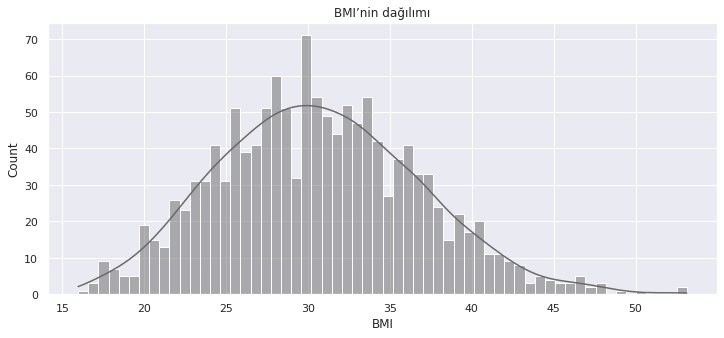

In [ ]:
# Vücut kitle indeksi normal dağılım göstermektedir.
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.histplot(df["bmi"] ,kde=True,bins=60,color='dimgray')
plt.xlabel("BMI")
plt.title("BMI’nin dağılımı")
plt.show()

# ***2- “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz***






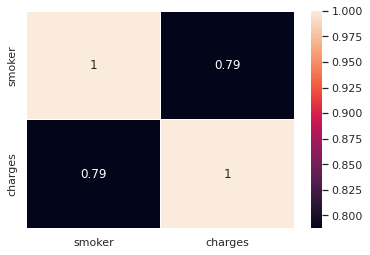

In [ ]:
# Smoker ile charges değişkeni arasında pozitif yönlü güçlü korelasyon mevcuttur.
x = df[['smoker','charges']].corr()
sns.heatmap(x,linewidths=.5,annot=True);

In [ ]:
x = df[['smoker','charges']].corr()
x

,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


# ***3-“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.***

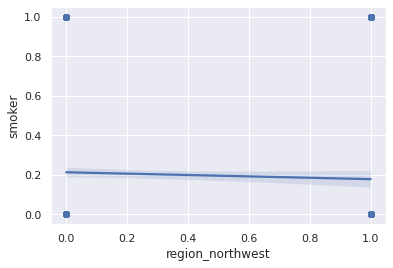

In [ ]:
# Region Northwest bölgesinde sigara kullanmayanlar daha fazla dağılım göstermiştir.
sns.regplot(x='region_northwest', y = 'smoker',data = df[['region_northwest','smoker']]);

# *** 4-“bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.***

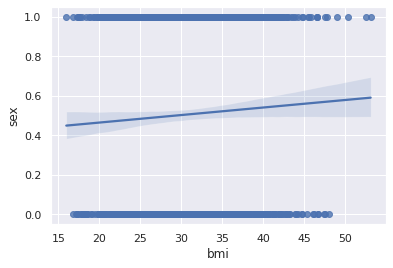

In [ ]:
# Erkeklerde vücut kitle indeksi kadınlara göre daha fazladır.
sns.regplot(x='bmi', y = 'sex',data = df[['bmi','sex']])
#0 = kadın 1 = erkek

# ***5-En çok “children”’a sahip “region”’ı bulunuz.***

In [ ]:
# Bölgelere göre çocuk sayısı dağılımları
# En çok çocuk southeast bölgesindedir
result=df.groupby('region')[["children"]].count().sort_values(by="children", ascending=False)
result


,children
region,
southeast,364
northwest,325
southwest,325
northeast,324


Text(0.5, 1.0, 'Çocuk Sayılarının Bölgelere Dağılı')

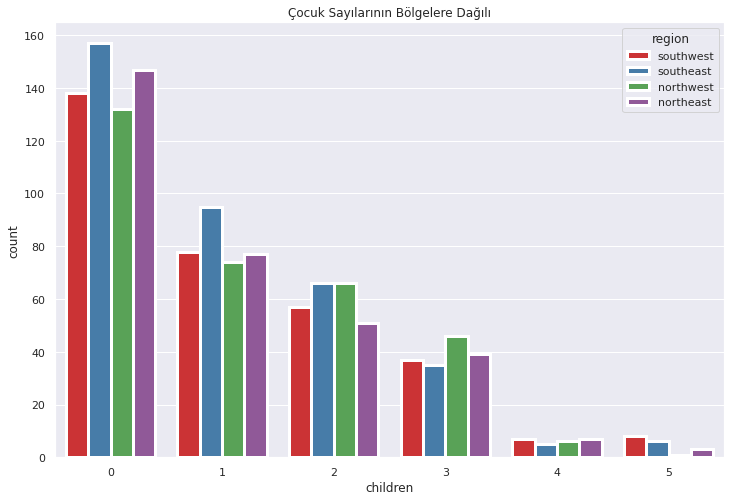

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
ax =sns.countplot(data=df, x="children", hue="region", 
                  palette="Set1",linewidth=3)
plt.title("Çocuk Sayılarının Bölgelere Dağılımı")

# ***6-“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.***

Text(0.5, 1.0, 'Relation between BMI And AGE')

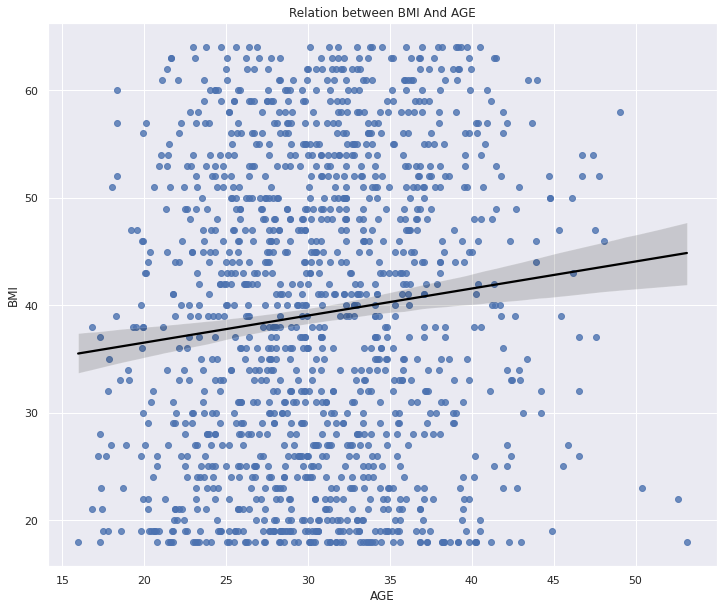

In [ ]:
#regplot
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid")
ax=sns.regplot(data=df, x="bmi", y="age",dropna=True,line_kws={"color": "black"})
plt.xlabel("AGE")
plt.ylabel("BMI")
plt.title("Relation between BMI And AGE")

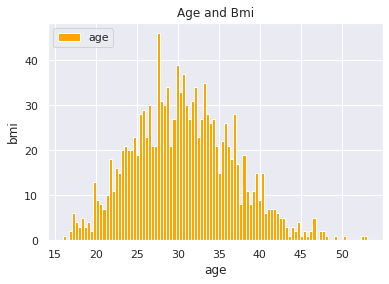

In [ ]:
plt.hist(df["bmi"], label="age", color='orange', bins=100)
plt.xlabel("age")
plt.ylabel("bmi")
plt.legend(loc = 2)
plt.title("Age and Bmi")
plt.show()

# ***7-“bmi” ile “children” arasındaki ilişkiyi inceleyiniz.***

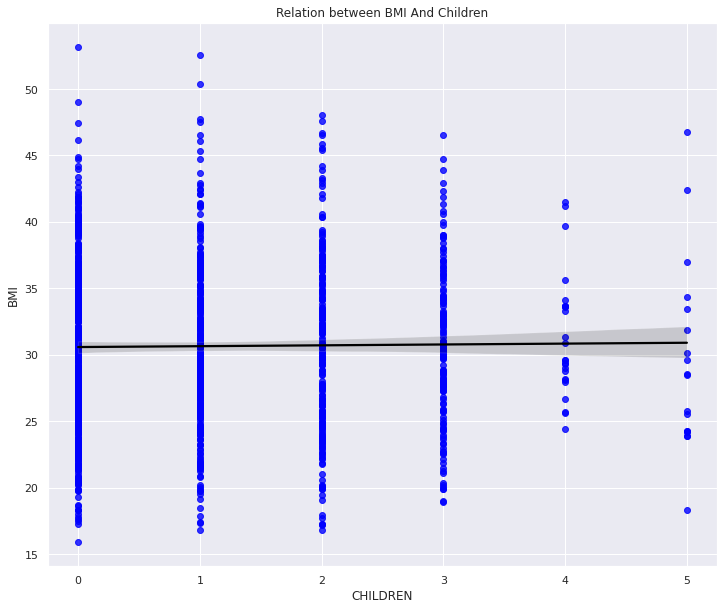

In [ ]:
# Çocuk sayısı ile vücut kitle indeksi arasında bir ilişki yoktur.
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid")
sns.regplot(data=df, y="bmi", x='children',dropna=True,scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.xlabel("CHILDREN")
plt.ylabel("BMI")
plt.title("Relation between BMI And Children")
plt.show()

# ***8-“bmi” değişkeninde outlier var mıdır? İnceleyiniz.***

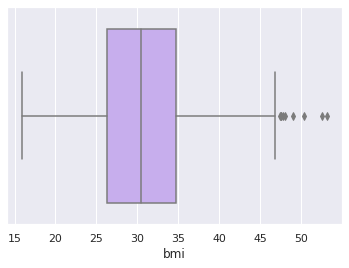

In [ ]:
# 45 değerin üzerinde bmi değişken için outlier vardır
sns.boxplot(x=df["bmi"]); 

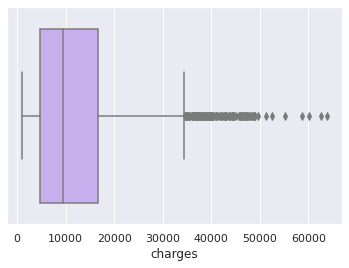

In [ ]:
sns.boxplot(x=df["charges"]);

# ***9-“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.***

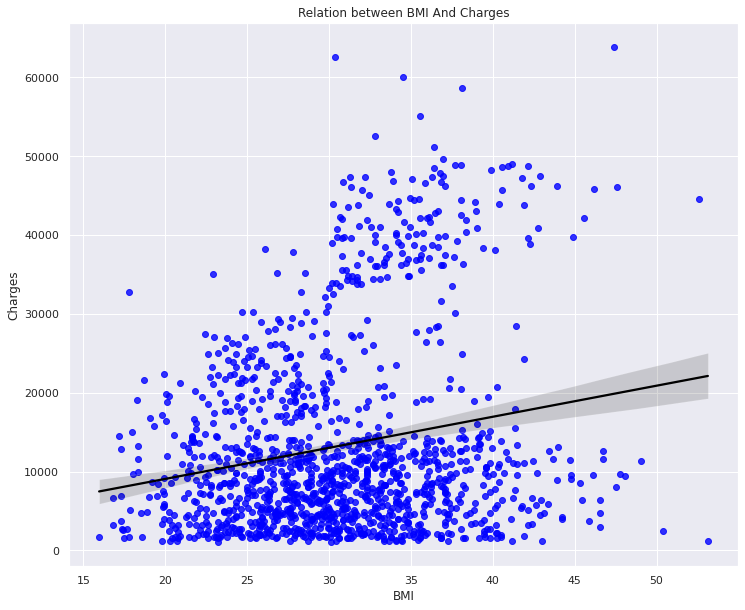

In [ ]:
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid")
sns.regplot(data=df, x="bmi", y='charges',dropna=True,scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Relation between BMI And Charges")
plt.show()

In [ ]:
df[["charges","bmi"]].corr()

,charges,bmi
charges,1.000000,0.198341
bmi,0.198341,1.000000


# ***10-“region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.***

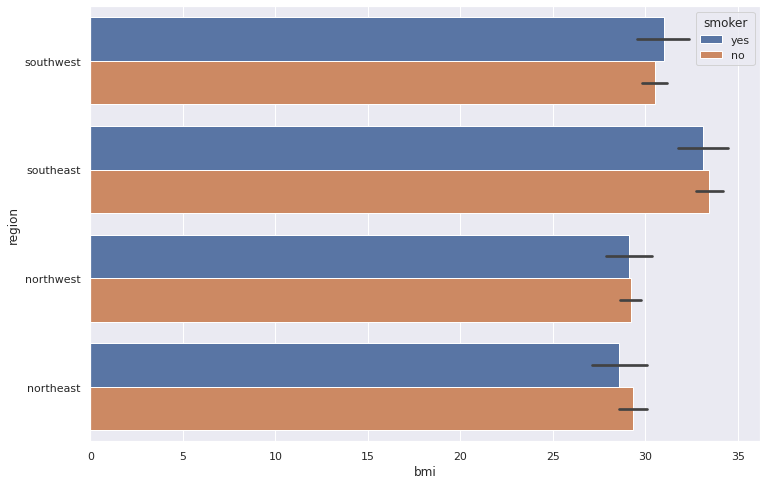

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
df=pd.DataFrame(df,columns=["region","smoker","bmi"])
sns.barplot(x="bmi",y="region",hue="smoker",data=df)

# ***Veri Ön İşleme Yapılması***

In [ ]:
from sklearn.preprocessing import StandardScaler

features = df[['age', 'bmi', 'charges']]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[['age', 'bmi', 'charges']] = features

# Model Kurgusu

In [ ]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,0,1,0.298584,0,0,1
1,-1.509965,1,0.509621,1,0,-0.953689,0,1,0
2,-0.797954,1,0.383307,3,0,-0.728675,0,1,0
3,-0.441948,1,-1.305531,0,0,0.719843,1,0,0
4,-0.513149,1,-0.292556,0,0,-0.776802,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,-0.220551,1,0,0
1334,-1.509965,0,0.206139,0,0,-0.914002,0,0,0
1335,-1.509965,0,1.014878,0,0,-0.961596,0,1,0
1336,-1.296362,0,-0.797813,0,0,-0.930362,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 66.8 KB


In [ ]:
# pattern veri üzerinde ilişki
X = df.drop(['charges'],axis = 1)
y=  df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42, shuffle=True)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
560,0.483668,0,-1.757474,2,0,1,0,0
1285,0.554869,0,-1.040599,0,0,0,0,0
1142,0.910875,0,-0.952015,0,0,0,1,0
969,-0.014740,0,0.599846,5,0,0,1,0
486,1.053277,0,-1.508126,3,0,1,0,0
...,...,...,...,...,...,...,...,...
1095,-1.509965,0,0.112633,4,0,0,0,0
1130,-0.014740,0,-1.114419,5,0,0,1,0
1294,1.338082,1,-0.900341,0,0,0,0,0
860,-0.157143,0,2.778356,2,1,0,0,1


In [ ]:
# dengesiz veri seti nedir
ridge = Ridge()
ridge.fit(X_train,y_train)

#ridge_success = cross_val_score(estimator = ridge, X = X_train, y = y_train, cv=5)
#print(f"Başarı skoru (ortalama yüzde): %{ridge_success.mean()*100}, Standart sapma başarısı : %{ridge_success.std()*100}")

Ridge()

In [ ]:
linear = LinearRegression()
linear.fit(X_train,y_train)
#linear_success = cross_val_score(estimator = linear, X = X_train, y = y_train, cv=5)
#print(f"Başarı skoru (ortalama yüzde): %{linear_success.mean()*100}, Standart sapma başarısı: %{linear_success.std()*100}")

LinearRegression()

In [ ]:
lass = Lasso()
lass.fit(X_train,y_train)
#lass.score(X_test,y_test)
#lass_success = cross_val_score(estimator = lass, X = X_train, y = y_train, cv=5)
#print(f"Başarı skoru (ortalama yüzde): %{lass_success.mean()*100}, Standart sapma başarısı: %{lass_success.std()*100}")

Lasso()

In [ ]:
e_net = ElasticNet()
e_net.fit(X_train,y_train)

#e_net_success  = cross_val_score(estimator = e_net, X = X_train, y = y_train, cv=5)
#print(f"Başarı skoru (ortalama yüzde): %{e_net_success.mean()*100}, Standart sapma başarısı: %{e_net_success.std()*100}")

ElasticNet()

In [ ]:
decision = DecisionTreeRegressor()
decision.fit(X_train,y_train)
#decision_success = cross_val_score(estimator = decision, X = X_train, y = y_train, cv=5)
#print(f"Başarı skoru (ortalama yüzde): %{decision_success.mean()*100}, Standart sapma başarısı: %{decision_success.std()*100}")

DecisionTreeRegressor()

In [ ]:
svr = SVR()
svr.fit(X_train,y_train)
#svr_success = cross_val_score(estimator = svr, X = X_train, y = y_train, cv=5)
#print(f"Başarı skoru (ortalama yüzde): %{svr_success.mean()*100}, Standart sapma başarısı: %{svr_success.std()*100}")

SVR()

In [ ]:
sgd = SGDRegressor()
sgd.fit(X_train,y_train)
#sgd_success = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv=5)
#print(f"Başarı skoru (ortalama yüzde): %{sgd_success.mean()*100}, Standart sapma başarısı: %{sgd_success.std()*100}")

SGDRegressor()

In [ ]:
model_list = [ridge, linear, lass, e_net, decision, svr, sgd]

In [ ]:
ridge_tahmin = ridge.predict(X_test)
linear_tahmin = linear.predict(X_test)
lass_tahmin = lass.predict(X_test)
e_net_tahmin = e_net.predict(X_test)
decision_tahmin = decision.predict(X_test)
svr_tahmin = svr.predict(X_test)
sgd_tahmin = sgd.predict(X_test)

In [ ]:
for i in model_list:
  cross_val_score(i,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
  mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
  print(f"{i} modeli için mse skoru {mse}")
  # En düşük MSE skoru Svr modeline ait

Ridge() modeli için mse skoru 0.258934705608415
LinearRegression() modeli için mse skoru 0.2589543786898479
Lasso() modeli için mse skoru 0.9867258104260216
ElasticNet() modeli için mse skoru 0.9867258104260216
DecisionTreeRegressor() modeli için mse skoru 0.2873369558282284
SVR() modeli için mse skoru 0.16780815236888275
SGDRegressor() modeli için mse skoru 0.26111349042889637


# Tahminler

# Hiper-parametre Optimizasyonu

In [ ]:
svr_params = {'kernel': ['linear','sigmoid', 'poly'],
              'degree': np.arange(0,10,2),
              'gamma': ['scale','auto'],
              'tol': [1e-3, 1e-4, 1e-5],
              'C': [1,  2, 3]}

svr = SVR()
svr_gridcv_model = GridSearchCV(estimator = svr, param_grid = svr_params, cv = 5,scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
svr_gridcv_model.fit(X_train,y_train)
svr_gridcv_model.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


{'C': 3, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'tol': 1e-05}

In [ ]:
svr = SVR(C = 3, degree = 2, gamma = 'scale', kernel = 'poly', tol = 1e-05).fit(X_train,y_train)
cross_val_score(svr,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print(f"Optimize edilmiş Svr modeli için MSE skoru {mse}")

Optimize edilmiş Svr modeli için MSE skoru 0.26056057515604414


In [ ]:
ridge_params = {'fit_intercept': [True],
                'max_iter': [1000, 1100,1200,1300,1400,1500],
                'solver': ['auto','svd','cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
                'random_state': range(20,50,10),
                'alpha': [0.1,0.15,0.2,0.25,0.35,0.4,0.5]}

ridge = Ridge()
ridge_gridcv_model = GridSearchCV(estimator = ridge, param_grid = ridge_params, cv = 5,scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
ridge_gridcv_model.fit(X_train,y_train)
ridge_gridcv_model.best_params_

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


{'alpha': 0.1,
 'fit_intercept': True,
 'max_iter': 1000,
 'random_state': 40,
 'solver': 'saga'}

In [ ]:
# Grid Search Optimizasyonu sonucu gelen en iyi parametrelerin model eğitimi için tekrardan kullanılması

from sklearn.metrics import mean_absolute_error, mean_squared_error

ridge = Ridge(alpha=0.1,fit_intercept=True,max_iter=1000,random_state=40,solver='saga')
ridge.fit(X_train,y_train)
cross_val_score(svr,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print(f"Optimize edilmiş Ridge modeli için MSE skoru {mse}")

Başarı skoru (ortalama yüzde): %73.31847737030309, Standart sapma başarısı : %4.88760907537896


In [ ]:
lasso_params = {'alpha': [0.01,0.1,0.5,1.0,1.5,2.0,2.5,3.0],
                'fit_intercept': [True],
                'normalize': [True],
                'max_iter': range(750,2000,50),
                'tol': [0.001,0.01,0.1,0.25,0.5,1],
                'selection': ['cyclic','random'],
                'random_state': [21,25,30,35,42,48]}

lass = Lasso()
lass_gridcv_model = GridSearchCV(estimator = lass, param_grid = lasso_params, cv = 5,scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
lass_gridcv_model.fit(X_train,y_train)
lass_gridcv_model.best_params_

Fitting 5 folds for each of 14400 candidates, totalling 72000 fits


{'alpha': 0.01,
 'fit_intercept': True,
 'max_iter': 750,
 'normalize': True,
 'random_state': 21,
 'selection': 'cyclic',
 'tol': 0.001}

In [ ]:
lass = Lasso(alpha=0.01,fit_intercept=True,max_iter=750,normalize = True, random_state = 40,selection = 'cyclic',tol = 0.001)
lass.fit(X_train,y_train)
cross_val_score(lass,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print(f"Optimize edilmiş Lasso modeli için MSE skoru {mse}")

Başarı skoru (ortalama yüzde): %52.45551696646872, Standart sapma başarısı : %1.364682105537616


In [ ]:
linear_params = {'fit_intercept': [True,False],
                 'normalize': [True,False],
                 'copy_X': [True,False],
                 'n_jobs': np.arange(-1,10),
                 'positive': [True,False]
                 }

linear = LinearRegression()
linear_gridcv_model = GridSearchCV(estimator = linear, param_grid = linear_params, cv = 5,scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
linear_gridcv_model.fit(X_train,y_train)
linear_gridcv_model.best_params_

Fitting 5 folds for each of 176 candidates, totalling 880 fits


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': False,
 'positive': True}

In [ ]:
linear = LinearRegression(copy_X = True, fit_intercept = True, n_jobs = -1, normalize = True, positive = True).fit(X_train,y_train)
cross_val_score(linear,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print(f"Optimize edilmiş Svr modeli için MSE skoru {mse}")

Başarı skoru (ortalama yüzde): %73.42517261696247, Standart sapma başarısı : %4.954293024257445


In [ ]:
e_net_params = {'alpha': [1e-5, 1e-3,1e-1, 1.0, 10.0, 100.0],
                'l1_ratio': np.arange(0, 1, 0.10),
                'max_iter': np.arange(500,2000,500),
                'tol': [1e-5, 1e-2, 1e-1, 1.0, 10.0, 100.0]}

e_net = ElasticNet()
e_net_gridcv_model = GridSearchCV(estimator = e_net, param_grid = e_net_params, cv = 5,scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
e_net_gridcv_model.fit(X_train,y_train)
e_net_gridcv_model.best_params_

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


{'alpha': 1e-05, 'l1_ratio': 0.9, 'max_iter': 500, 'tol': 1.0}

In [ ]:
e_net  = ElasticNet(alpha = 1e-05, l1_ratio = 0.9, max_iter = 500, tol = 1.0).fit(X_train,y_train)
cross_val_score(e_net,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print(f"Optimize edilmiş ElasticNet modeli için MSE skoru {mse}")

Başarı skoru (ortalama yüzde): %73.31828876459885, Standart sapma başarısı : %4.903440047837976


In [ ]:
decision_params = {'splitter':['best','random'],
                  'max_depth' : [1,3,5,7,9,11,12],
                  'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
                  'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                  'max_features':['auto','log2','sqrt',None],
                  'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]}

decision = DecisionTreeRegressor()
decision_gridcv_model = GridSearchCV(estimator = decision, param_grid = decision_params, cv = 5,scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
decision_gridcv_model.fit(X_train,y_train)
decision_gridcv_model.best_params_

Fitting 5 folds for each of 50400 candidates, totalling 252000 fits


{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
decision = DecisionTreeRegressor(max_depth = 5, max_features = 'auto', max_leaf_nodes = 40, min_samples_leaf = 5, min_weight_fraction_leaf = 0.1, splitter = 'best').fit(X_train,y_train)
cross_val_score(decision,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print(f"Optimize edilmiş Svr modeli için MSE skoru {mse}")

Başarı skoru (ortalama yüzde): %78.24119486319732, Standart sapma başarısı : %4.703113104438056


In [ ]:
sgd_params = {'max_iter': [500,750,1000,100000, 1000000],
              'tol': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4, 1e-3,1e-2],
              'eta0': [0.001, 0.01]
              }

sgd = SGDRegressor()
sgd_gridcv_model = GridSearchCV(estimator = sgd, param_grid = sgd_params, cv = 5,scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
sgd_gridcv_model.fit(X_train,y_train)
sgd_gridcv_model.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'eta0': 0.01, 'max_iter': 1000000, 'tol': 1e-05}

In [ ]:
sgd = SGDRegressor(eta0 = 0.01, max_iter = 1000000, tol = 1e-05).fit(X_train,y_train)
cross_val_score(sgd,X_train,y_train, cv = 5, scoring = 'neg_mean_squared_error')
mse = np.mean(-cross_val_score(i ,X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print(f"Optimize edilmiş Svr modeli için MSE skoru {mse}")

Başarı skoru (ortalama yüzde): %73.32141625642915, Standart sapma başarısı : %4.8172218051237685
